### gradient descendent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

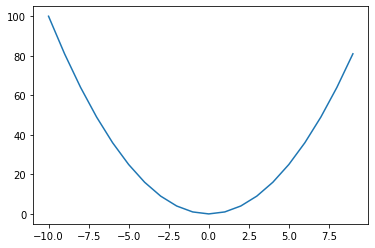

In [3]:
x = np.arange(-10, 10, 1)
f_x = x ** 2

sns.lineplot(x = x, y = f_x)
plt.show()

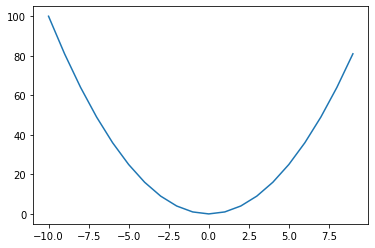

In [4]:
plt.plot(x, f_x)
plt.show()

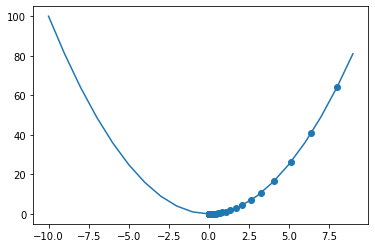

In [6]:
x_new = 10
derivative = []
y = []
learning_rate = 0.1
for i in range(100):
    old_value = x_new 
    derivative.append(old_value - learning_rate * 2 * old_value)
    x_new = old_value - learning_rate * 2 * old_value 
    y.append(x_new ** 2)
    
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

## 5 선형회귀 성능 측정하기

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


### 절대편차를 통한 성능 지표

In [9]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)


0.5

### RMSE: 평균제곱근 오차

In [10]:
from sklearn.metrics import mean_squared_error 
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

### 결정계수: R^2

In [12]:
from sklearn.metrics import r2_score 
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

## 6 코드로 선형회귀 구현하기

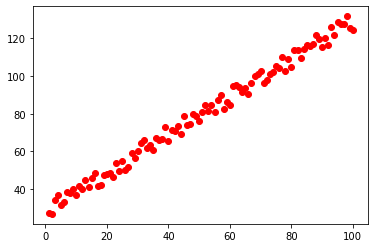

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
import random

def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    
    for i in range(0, numPoints):
        x[i][0] = 1 # 데이터 x의 상수항은 1
        x[i][1] = i # 데이터 x 값은 1씩 증가시킴
        y[i] = (i+bias) + random.uniform(0, 1) * variance
        
    return x, y 

x, y = gen_data(100, 25, 10)

plt.plot(x[:, 1]+1, y, "ro")
plt.show()

In [14]:
x

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 21.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 25.],
       [ 1., 26.],
       [ 1., 27.],
       [ 1., 28.],
       [ 1., 29.],
       [ 1., 30.],
       [ 1., 31.],
       [ 1., 32.],
       [ 1., 33.],
       [ 1., 34.],
       [ 1., 35.],
       [ 1., 36.],
       [ 1., 37.],
       [ 1., 38.],
       [ 1., 39.],
       [ 1., 40.],
       [ 1., 41.],
       [ 1., 42.],
       [ 1., 43.],
       [ 1., 44.],
       [ 1., 45.],
       [ 1., 46.],
       [ 1., 47.],
       [ 1., 48.],
       [ 1., 49.],
       [ 1., 50.],
       [ 1., 51.],
       [ 1.,

In [15]:
y

array([ 27.07982937,  26.7067271 ,  34.15160575,  36.98252458,
        31.24857108,  33.30101662,  38.45155182,  37.9703166 ,
        40.17838869,  36.54012449,  41.6047302 ,  40.2055459 ,
        44.78276403,  41.21503884,  45.6133334 ,  48.58651052,
        41.36589137,  42.13537122,  47.28550376,  47.8160167 ,
        48.38254825,  46.10429184,  53.97378546,  49.31832117,
        54.75947435,  50.1519428 ,  51.86313912,  59.05154463,
        56.68726166,  60.05357423,  64.20420475,  65.75248842,
        61.50119283,  63.50206074,  60.63800306,  67.08113213,
        65.93189263,  66.61197416,  72.81810317,  65.69085688,
        71.1952141 ,  70.69157613,  73.31193962,  69.0033438 ,
        78.66789564,  73.98432068,  74.72476762,  79.59108841,
        78.65000973,  76.06434012,  80.77884433,  84.61591333,
        81.6530755 ,  84.85155004,  80.65554189,  87.33221061,
        89.66918985,  82.43834626,  86.18182726,  84.75718429,
        94.45903845,  95.29236027,  94.01448432,  91.31

In [16]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    cost_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient 
        if i % 250 == 0:
            theta_list.append(theta)
        cost_list.append(cost)
    return theta, np.array(theta_list), cost_list

m, n = np.shape(x)
numIterations = 5000
alpha = 0.0005
theta = np.ones(n)

theta, theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations)

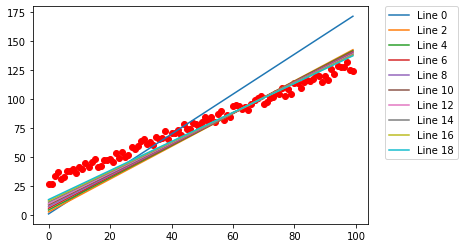

In [25]:
y_predict_step = np.dot(x, theta_list.transpose())
plt.plot(x[:, 1], y, "ro")
for i in range(0, 20, 2):
    plt.plot(x[:, 1], y_predict_step[:, i], label='Line %d'%i)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

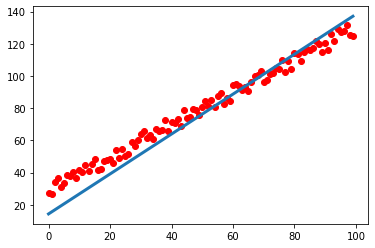

In [26]:
y_predict=np.dot(x, theta)
plt.plot(x[:, 1], y, 'ro')
plt.plot(x[:, 1], y_predict, lw=3)
plt.show()

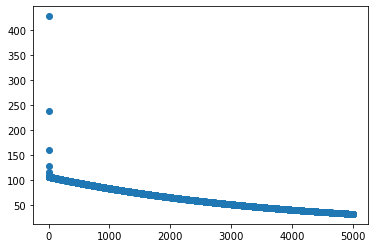

In [27]:
iterations = range(len(cost_list))

plt.scatter(iterations, cost_list)
plt.show()